# FFT Practice - CWRU

In [1]:
from scipy.io import loadmat

import numpy as np
import math as m
import matplotlib.pyplot as plt
from scipy.signal import hilbert

In [2]:
import z_dependancy as z_dep

%matplotlib

In [3]:
%matplotlib inline

In [4]:
plt.rc('font', size=20)

## 베어링 주파수 DB 만들기

In [5]:
fs=12000
F_BPFI = 5.4152
F_BPFO = 3.5848
F_FTF = 0.398
F_BSF = 4.7135
F_shaft_rpm = 1797
F_shaft = F_shaft_rpm/60

F_BPFI_w = F_BPFI*F_shaft
F_BPFO_w = F_BPFO*F_shaft
F_FTF_w = F_FTF*F_shaft
F_BSF_w = F_BSF*F_shaft

## 신호 로드하고 그려보기

In [8]:
mat = loadmat('./data/DE_Inner_0.021_1797.mat')
v=mat['X209_DE_time']

(-4, 4)

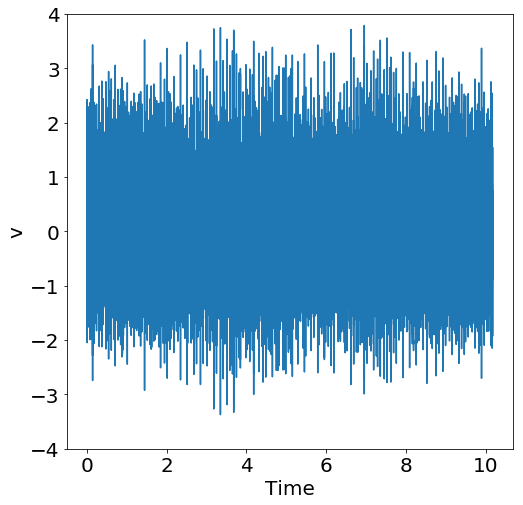

In [9]:
t=np.arange(1,len(v)+1,1)/fs

plt.figure(figsize=(8,8))
plt.plot(t,v)
plt.xlabel('Time')
plt.ylabel('v')
plt.ylim([-4,4])

## 주파수 분석해보기

In [10]:
f, A = z_dep.z_fft_simple(v,fs)

(0, 0.12)

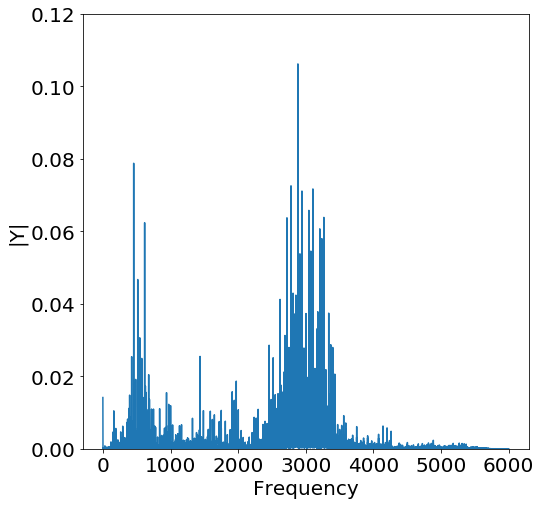

In [11]:
plt.figure(figsize=(8,8))
plt.plot(f,A)
plt.xlabel('Frequency')
plt.ylabel('|Y|')
plt.ylim([0,0.12])

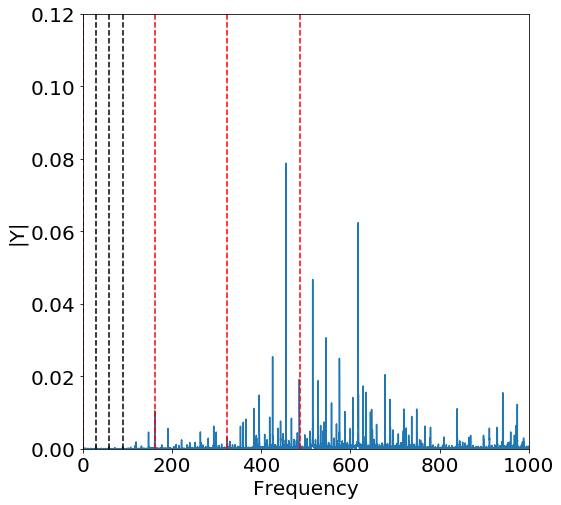

In [12]:
plt.figure(figsize=(8,8))
plt.plot(f,A)
plt.xlabel('Frequency')
plt.ylabel('|Y|')
plt.xlim([0, 1000])
plt.ylim([0,0.12])

for n in range(4):
    plt.plot((n*F_shaft, n*F_shaft), (0, 0.3), 'k', linestyle='dashed')
    plt.plot((n*F_BPFI_w, n*F_BPFI_w), (0, 0.3), 'r', linestyle='dashed')

## 포락선 분석해보기

[0, 500, 0, 0.3]

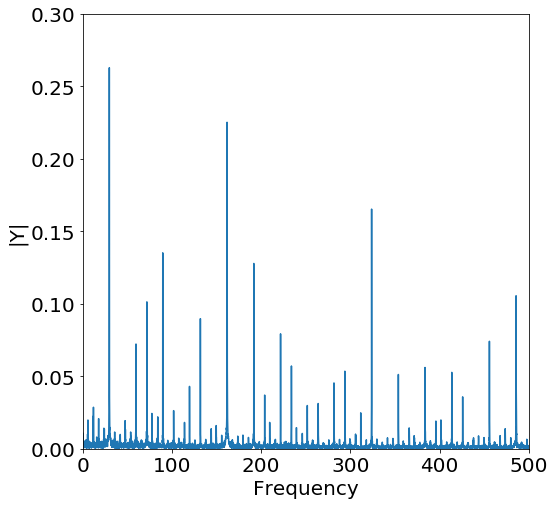

In [13]:
v_env = abs(hilbert(v,axis=0));

[f_env, A_env] = z_dep.z_fft_simple(v_env-np.mean(v_env),fs);

plt.figure(figsize=(8,8))
plt.plot(f_env,A_env)
plt.xlabel('Frequency')
plt.ylabel('|Y|')
plt.axis([0,500,0,0.3])

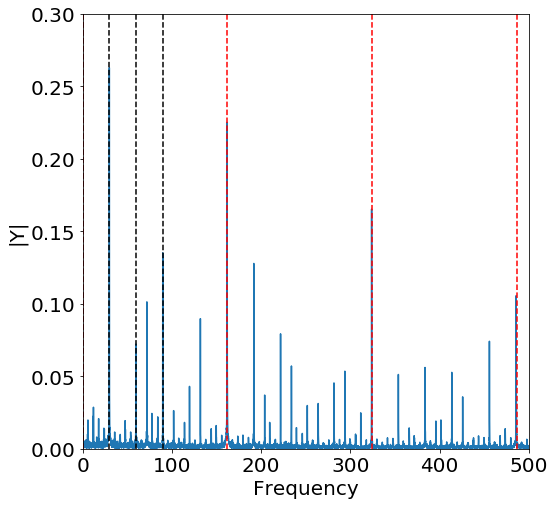

In [14]:
plt.figure(figsize=(8,8))
plt.plot(f_env,A_env)
plt.xlabel('Frequency')
plt.ylabel('|Y|')
plt.axis([0,500,0,0.3])

for n in range(4):
    plt.plot((n*F_shaft, n*F_shaft), (0, 0.3), 'k', linestyle='dashed')
    plt.plot((n*F_BPFI_w, n*F_BPFI_w), (0, 0.3), 'r', linestyle='dashed')